## Source : 
The report primarily uses data from the Gallup World Poll. Each variable is  measured  on a scale running from 0 to 10

## Hisory : 
The first World Happiness Report was released on April 1, 2012 as a foundational text for the UN defining a New Economic Paradigm,drawing international attention.
These factors include:

## 1. Social support

## 2. Healthy life expectancy

## 3. Economy

## 4. Freedom to make life choices

## 5. Generosity

## 6. Trust (perceptions of corruption )

### We tried to answer below questions :

## Question 1 :
Did hosting the Olympics in 2016 have an affect on the Happiness Score in Brazil?
## Question 2 :
How did the Happiness Score and its factors change before and after Olympics from 2015 to 2021 ?

In [53]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [54]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import pandas as pd
import numpy as np
import os
import glob
import seaborn as sns
from matplotlib.pyplot import figure
import plotly.graph_objs as go 
from plotly.offline import plot
import warnings
warnings.filterwarnings('ignore')

In [55]:
Olympics_HostingCountry = pd.read_csv("../Priya/archive/MergedData.csv")
Olympics_HostingCountry.round(decimals=2)

,Year,Country,Region,Happiness Rank,Happiness Score,Economy,Social support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,2015,Brazil,Latin America and Caribbean,16,6.98,0.98,1.23,0.70,0.49,0.18,0.15
1,2016,Brazil,Latin America and Caribbean,17,6.95,7.03,1.09,1.04,0.61,0.40,0.16
2,2017,Brazil,Latin America and Caribbean,22,6.64,1.11,1.43,0.62,0.44,0.11,0.16
3,2018,Brazil,Latin America and Caribbean,28,6.42,0.99,1.47,0.68,0.49,0.09,0.11
4,2019,Brazil,Latin America and Caribbean,32,6.30,1.00,1.44,0.80,0.39,0.09,0.10
5,2020,Brazil,Latin America and Caribbean,33,6.38,0.95,1.36,0.77,0.48,0.11,0.13
6,2021,Brazil,Latin America and Caribbean,35,6.33,1.03,0.51,0.57,0.51,0.12,0.14


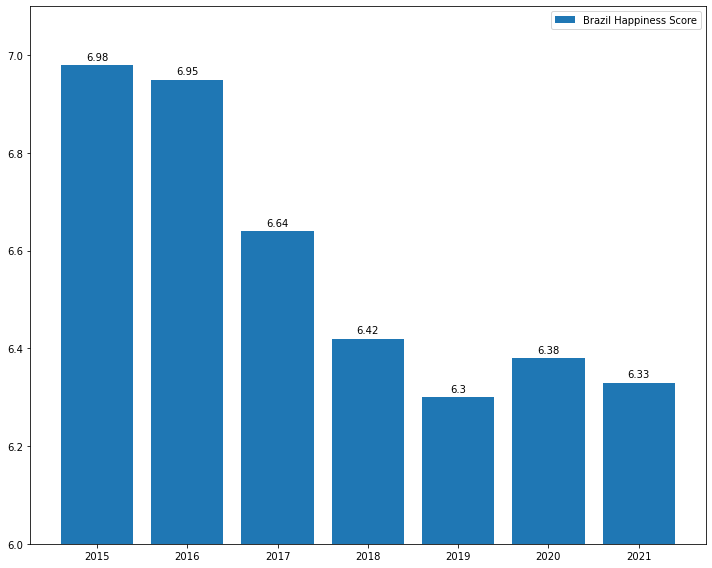

In [56]:
Year =[2015,2016,2017,2018,2019,2020,2021]
Happiness_Score=[6.98,6.95,6.64,6.42,6.30,6.38,6.33]
fig=plt.figure(figsize=(10,8))
plt.ylim(6, 7.1)

barchart =plt.bar(Year,Happiness_Score,label='Brazil Happiness Score')

def autolabel(rects):
    for rect in rects:
        height =rect.get_height()
        plt.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2,height),
                    xytext=(0,3),
                    textcoords ="offset points",
                    ha='center',va='bottom')
autolabel(barchart)

plt.tight_layout()
plt.legend()

In [57]:
# Save the figure
plt.show()
fig.savefig("../Priya/archive/Happiness Score.png")

In [58]:
Year =[2015,2016,2017,2018,2019,2020,2021]
Economy=[0.98,7.03,1.11,0.99,1.0,0.95,1.03]
x_axis = np.arange(len(Economy))

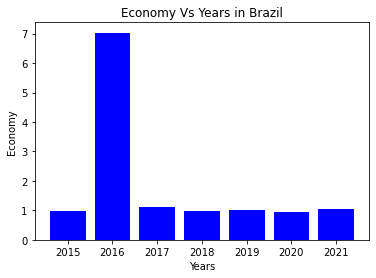

In [59]:
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,Year)
plt.title("Economy Vs Years in Brazil")
plt.xlabel("Years")
plt.ylabel("Economy")
plt.bar(x_axis,Economy,color="b",align="center")
plt.show()

In [60]:
SpecificData = Olympics_HostingCountry[['Year','Happiness Score','Economy','Social support','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity']]
SpecificData

,Year,Happiness Score,Economy,Social support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,2015,6.9830,0.981240,1.232870,0.697020,0.490490,0.175210,0.145740
1,2016,6.9520,7.029000,1.087540,1.039380,0.614150,0.404250,0.157760
2,2017,6.6350,1.107353,1.431306,0.616552,0.437454,0.111093,0.162350
3,2018,6.4190,0.986000,1.474000,0.675000,0.493000,0.088000,0.110000
4,2019,6.3000,1.004000,1.439000,0.802000,0.390000,0.086000,0.099000
5,2020,6.3756,0.952680,1.363464,0.766119,0.483293,0.106519,0.131675
6,2021,6.3300,1.027845,0.514314,0.570779,0.514314,0.116669,0.141626


In [61]:
WorldMap = pd.read_csv("../Priya/archive/2021.csv")
WorldMap.round(decimals=2)

,Country,Parameter link,Dystopia (2.43) + residual,Explained by: Freedom to make life choices,Explained by: Economy,Explained by: Generosity,Explained by: Healthy life expectancy,Explained by: Perceptions of corruption,Explained by: Social support,Happiness score,Interval,Range,Range.1,Rank,Whisker-high,Whisker-low
0,1. Finland (7.842),True,3.25,0.69,1.45,0.12,0.74,0.48,1.11,7.84,7.90,0.12,0.12,1,7.90,7.78
1,2. Denmark (7.620),True,2.87,0.69,1.50,0.21,0.76,0.48,1.11,7.62,7.69,0.14,0.14,2,7.69,7.55
2,3. Switzerland (7.571),True,2.84,0.65,1.57,0.20,0.82,0.41,1.08,7.57,7.64,0.14,0.14,3,7.64,7.50
3,4. Iceland (7.554),True,2.97,0.70,1.48,0.29,0.77,0.17,1.17,7.55,7.67,0.23,0.23,4,7.67,7.44
4,5. Netherlands (7.464),True,2.80,0.65,1.50,0.30,0.75,0.38,1.08,7.46,7.52,0.11,0.11,5,7.52,7.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,145. Lesotho (3.512)*,True,1.80,0.41,0.45,0.10,0.01,0.02,0.73,3.51,3.75,0.47,0.47,145,3.75,3.28
145,146. Botswana (3.467)*,True,0.65,0.54,1.10,0.03,0.34,0.09,0.72,3.47,3.61,0.29,0.29,146,3.61,3.32
146,147. Rwanda (3.415)*,True,1.10,0.63,0.36,0.23,0.41,0.49,0.20,3.41,3.55,0.27,0.27,147,3.55,3.28
147,148. Zimbabwe (3.145),True,1.20,0.36,0.46,0.16,0.24,0.08,0.65,3.14,3.26,0.23,0.23,148,3.26,3.03


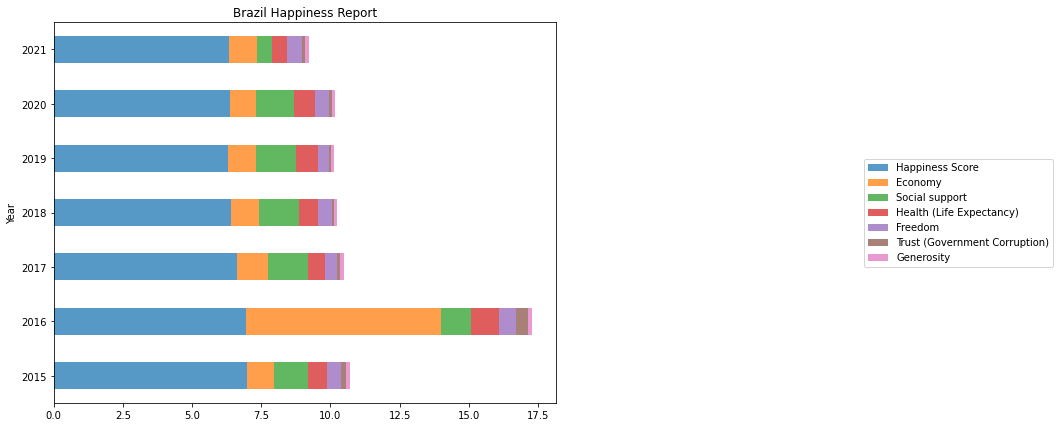

In [62]:
plot=SpecificData.plot(x='Year', kind='barh', stacked=True,
        title='Brazil Happiness Report',figsize=(9,7),alpha =0.75)
# SpecificData['Country'].sort_values(ascending=False)
plt.legend(title='',bbox_to_anchor=(2,.5),loc='right')
fig = plot.get_figure()
fig.savefig("../Priya/archive/output3.png")

Social Support vs GDP per capita vs Healthy life expectancy

In [63]:
support_GDP_Health = SpecificData[['Year','Economy',
                                        'Social support','Health (Life Expectancy)']]
support_GDP_Health

,Year,Economy,Social support,Health (Life Expectancy)
0,2015,0.981240,1.232870,0.697020
1,2016,7.029000,1.087540,1.039380
2,2017,1.107353,1.431306,0.616552
3,2018,0.986000,1.474000,0.675000
4,2019,1.004000,1.439000,0.802000
5,2020,0.952680,1.363464,0.766119
6,2021,1.027845,0.514314,0.570779


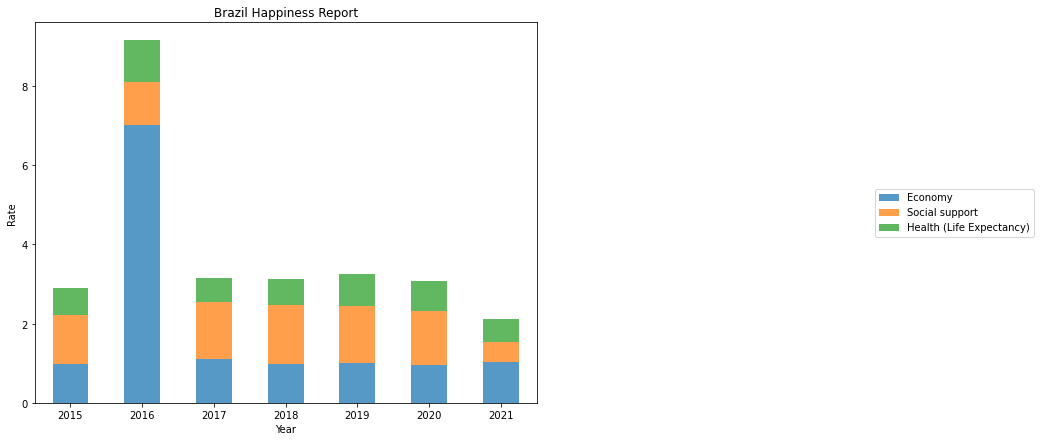

In [64]:
plot=support_GDP_Health.plot(x='Year', kind='bar', stacked=True,
        title='Brazil Happiness Report',figsize=(9,7),alpha =0.75)
# SpecificData['Country'].sort_values(ascending=False)
plt.legend(title='',bbox_to_anchor=(2,.5),loc='right')
plt.xticks(rotation='horizontal')
plt.xlabel("Year")
plt.ylabel("Rate")
fig = plot.get_figure()
fig.savefig("../Priya/archive/support_GDP_Health.png")

Freedom to make life choices vs Generosity vs Corruption

In [65]:
Freedom_Gnerosity_Corruption = SpecificData[['Year','Freedom','Trust (Government Corruption)','Generosity']]
Freedom_Gnerosity_Corruption

,Year,Freedom,Trust (Government Corruption),Generosity
0,2015,0.490490,0.175210,0.145740
1,2016,0.614150,0.404250,0.157760
2,2017,0.437454,0.111093,0.162350
3,2018,0.493000,0.088000,0.110000
4,2019,0.390000,0.086000,0.099000
5,2020,0.483293,0.106519,0.131675
6,2021,0.514314,0.116669,0.141626


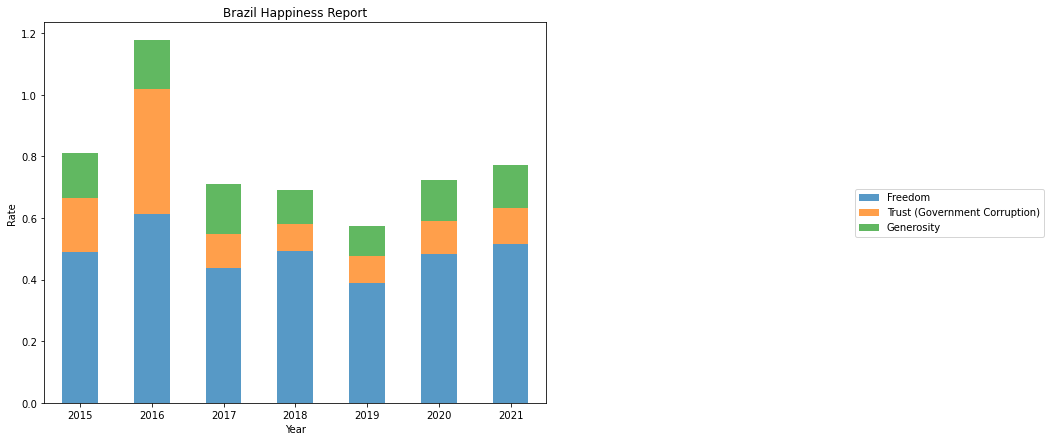

In [66]:
plot=Freedom_Gnerosity_Corruption.plot(x='Year', kind='bar', stacked=True,
        title='Brazil Happiness Report',figsize=(9,7),alpha =0.75)
# SpecificData['Country'].sort_values(ascending=False)
plt.legend(title='',bbox_to_anchor=(2,.5),loc='right')
plt.xticks(rotation='horizontal')
plt.ylabel("Rate")
fig = plot.get_figure()
fig.savefig("../Priya/archive/Freedom_Gnerosity_Corruption.png")

In [67]:
# Top 15 hapy , top 15 sad countries in compariosn with Brazil
HappySad = pd.read_csv("../Priya/archive/WorldMap-2021.csv")
HappySad.round(decimals=2)

,Country,Score,Economy,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust (Perception of corruption)
0,Finland,7.77,1.34,1.59,0.99,0.60,0.15,0.39
1,Denmark,7.60,1.38,1.57,1.00,0.59,0.25,0.41
2,Norway,7.55,1.49,1.58,1.03,0.60,0.27,0.34
3,Iceland,7.49,1.38,1.62,1.03,0.59,0.35,0.12
4,Netherlands,7.49,1.40,1.52,1.00,0.56,0.32,0.30
5,Switzerland,7.48,1.45,1.53,1.05,0.57,0.26,0.34
6,Sweden,7.34,1.39,1.49,1.01,0.57,0.27,0.37
7,New Zealand,7.31,1.30,1.56,1.03,0.58,0.33,0.38
8,Canada,7.28,1.36,1.50,1.04,0.58,0.28,0.31
9,Austria,7.25,1.38,1.48,1.02,0.53,0.24,0.23


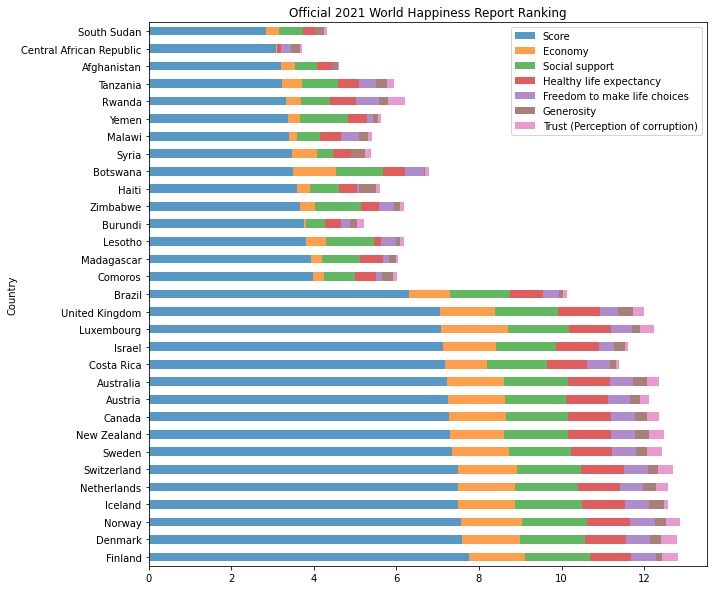

In [68]:
plot=HappySad.plot(x='Country', kind='barh', stacked=True,
        title='Official 2021 World Happiness Report Ranking',figsize=(10,10),alpha =0.75)
# HappySad['Country'].sort_values(ascending=False)
HappySad.sort_index(ascending=True)
fig = plot.get_figure()
fig.savefig("../Priya/archive/Official 2021 World Happiness Report Ranking.png")

In [3]:
WorldMapNew = pd.read_csv("../Priya/archive/NewWorldMap.csv")
WorldMapNew.round(decimals=2)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.81,0.03,7.87,7.75,10.64,0.95,71.90,0.95,-0.06,0.20,1.97,1.29,1.50,0.96,0.66,0.16,0.48,2.76
1,Denmark,Western Europe,7.65,0.03,7.71,7.58,10.77,0.96,72.40,0.95,0.07,0.17,1.97,1.33,1.50,0.98,0.67,0.24,0.50,2.43
2,Switzerland,Western Europe,7.56,0.04,7.63,7.49,10.98,0.94,74.10,0.92,0.11,0.30,1.97,1.39,1.47,1.04,0.63,0.27,0.41,2.35
3,Iceland,Western Europe,7.50,0.06,7.62,7.39,10.77,0.97,73.00,0.95,0.25,0.71,1.97,1.33,1.55,1.00,0.66,0.36,0.14,2.46
4,Norway,Western Europe,7.49,0.03,7.56,7.42,11.09,0.95,73.20,0.96,0.13,0.26,1.97,1.42,1.50,1.01,0.67,0.29,0.43,2.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.48,0.12,3.70,3.25,6.63,0.32,45.20,0.64,0.08,0.89,1.97,0.04,0.00,0.00,0.29,0.25,0.03,2.86
149,Rwanda,Sub-Saharan Africa,3.31,0.05,3.42,3.21,7.60,0.54,61.10,0.90,0.06,0.18,1.97,0.34,0.52,0.57,0.60,0.24,0.49,0.55
150,Zimbabwe,Sub-Saharan Africa,3.30,0.06,3.41,3.18,7.87,0.76,55.62,0.71,-0.07,0.81,1.97,0.43,1.05,0.38,0.38,0.15,0.08,0.84
151,South Sudan,Sub-Saharan Africa,2.82,0.11,3.03,2.61,7.43,0.55,51.00,0.45,0.02,0.76,1.97,0.29,0.55,0.21,0.07,0.21,0.11,1.38


In [5]:
data = dict(type = 'choropleth', 
           locations = WorldMapNew['Country name'],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = WorldMapNew['Ladder score'],
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Geographical Visualization of Happiness Score',
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
plot(choromap3)
choromap3.write_image("../Priya/archive/World Map.png")

# Conclusions
## Question 1 :
Did hosting the Olympics in 2016 have an affect on the Happiness Score in Brazil?
### Answer :
Hosting Olympics didn't have any major effect in hapinesss score but did had an after effect and score went low after 2016 .
## Question 2 : 

How did the Happiness Score and its factors change before and after Olympics from 2015 to 2021 ?
### Answer : 
The only factor which change in 2016 is Brazil's GDP which didnt not contribute in adding up to the hapiness score .